In [23]:
#>  python3 -c "import jupyter, matplotlib, numpy, pandas,scipy, sklearn"
#> juypter notebook

import os
import tarfile
from six.moves import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
Housing_path = os.path.join("datasets", "housing")
Housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=Housing_url, housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz=tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

In [24]:
import pandas as pd

def load_housing_data(housing_path=Housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [66]:
fetch_housing_data()
housing = load_housing_data()
#housing[0:24]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
# obtain information on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
# column "ocean_proximity" per above table contains non-numerical data types
# below gets the distinct num of entries from this column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
# SICK Method;
# display summary of the numerical entries
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


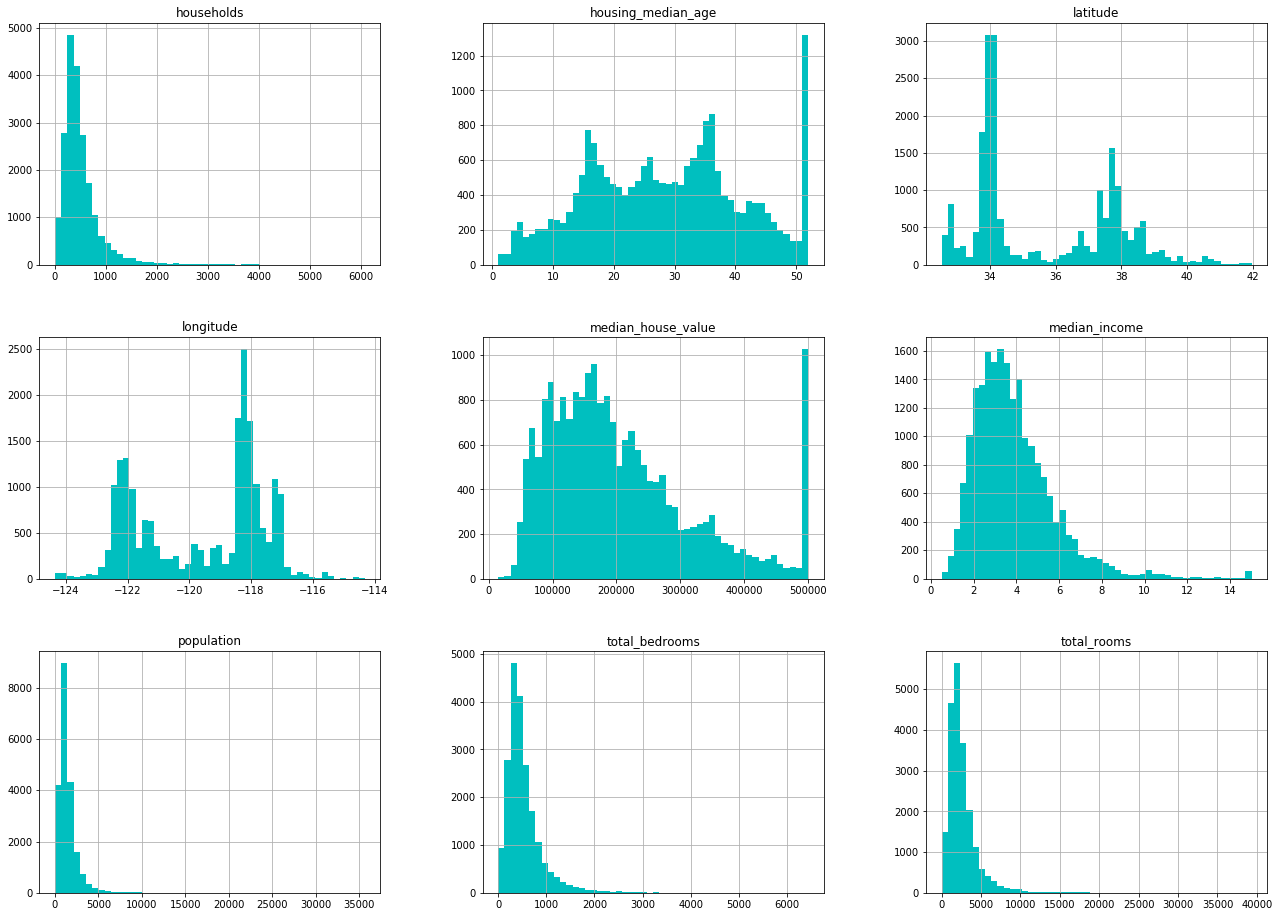

In [49]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(22,16), color = "c")
plt.show()

In [52]:
# take 20% as training set
# np.random_permutation -> https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html
# .iloc SICK Function
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
train_set, test_set = split_train_test(housing, 0.2)
print(train_set[0:10])

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16242    -121.30     37.99                38.0       2375.0           494.0   
4446     -118.21     34.07                31.0       1077.0           300.0   
7495     -118.25     33.93                38.0        180.0            43.0   
15299    -117.34     33.15                17.0       4505.0          1140.0   
8342     -118.33     33.93                37.0       1831.0           356.0   
23       -122.27     37.84                52.0       1688.0           337.0   
14942    -116.99     32.74                17.0       3101.0           547.0   
10348    -117.66     33.60                24.0       1684.0           232.0   
407      -122.27     37.89                52.0       3046.0           373.0   
11311    -117.96     33.78                33.0       1520.0             NaN   

       population  households  median_income  median_house_value  \
16242      1167.0       471.0         2.6673             87500